<a href="https://colab.research.google.com/github/srijoy18/PRO/blob/main/MOVIE_SENTIMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CREATE A SENTIMENT ANALYSIS MODEL THAT READS A MOVIE REVIEW AND THEN PREDICTS WHETHER ITS A POSITIVE OR A NEGATIVE SENTIMENT.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
df.duplicated().sum()

418

In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df=df.drop_duplicates()

In [ ]:
df=df.iloc[:10000]

In [ ]:
#cleaning
# convert into lower case
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['review']=df['review'].str.lower()

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
#remove whitespaces and trim
df['review']=df['review'].str.strip()

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
import re  # re - regular expression

def remove_html(data):  #function name remove_html that receives data
  data=re.sub(r'<.*?>',"",data)  # substitute <.*?> with "" empty string
  return data

In [ ]:
remove_html('<p> my name is Srijoy </p><br><imhg>')

' my name is Srijoy '

In [ ]:
#remove html tags
df['review']=df['review'].apply(remove_html)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
# remove http:// and www.

def remove_url(data):
  data=re.sub(r'https?://\S+|www.\S+',"",data)
  return data

In [ ]:
remove_url("to register log on to http://campus.co.in.du.ac.in")

'to register log on to '

In [ ]:
remove_url("to register log on to https://campus.co.in.du.ac.in")

'to register log on to '

In [ ]:
df['review'].str.replace(r'https?://\S+|www.\S+',"")

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
10012,i was pleasantly surprised to find that how to...
10013,this is a very moving film that takes a new tw...
10014,apart from the beautiful imagery thanks to new...
10015,this is a perfect series for family viewing. w...


In [ ]:
#to find out the reviews that contain urls
(df[df['review'].str.contains(r'https?://\S+|www.\S+')]).iloc[4].values

array(['possible spoilers, perhaps. i must say that "cinderella ii: dreams come true" is one of the worst movies ever made. first of all, the movie was made during the height of disney\'s sequel rampage. it was created around the same time as "the little mermaid ii," "the jungle book ii," and "peter pan ii," all of which were disservices to their original film classics. (disney also made "the hunchback of notre dame ii" and "atlantis ii," but i\'m going to drop that topic because their original movies were never really classics in the first place.") let me go ahead and say that i am an avid supporter of good disney films, and i absolutely adore the original disney "cinderella." the sequel to "cinderella," however, was a waste of time. the character of cinderella in the sequel was so very unlike the original girl that i grew up watching. in the original, cinderella was kind and loving. the new cinderella had very out-of-character moments with current-era phrasing like, "i\'m going to do

In [ ]:
df['review']=df['review'].str.replace(r'https?://\S+|www.\S+',"")

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
# expanding abbvr

# expand

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data = re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)
    data = re.sub(r"donå«t", "do not", data)
    data = re.sub(r"We'll", "We will", data)

    return data

In [ ]:
remove_abb("I'll go there.we'll have fun.I can't tell.He won't come.")

'I will go there.we will have fun.I cannot tell.He will not come.'

In [ ]:
df['review']=df['review'].apply(remove_abb)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
# Spelling correction
# we will use texblob library as spelling corrections are very extensive and time taking.

# package-lowercase
# class - upper

In [ ]:
from textblob import TextBlob
t1='hi . I can drve at nigt'
TextBlob(t1).correct().string

'hi . I can drove at night'

In [ ]:
from textblob import TextBlob

def spell_c(text):
  return TextBlob(text).correct().string

In [ ]:
#df['review'].apply(spell_c)

In [ ]:
#punctuation
import string #import string module


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc(text):
  for i in string.punctuation:
    if i in text:
      text=text.replace(i,"")

  return text

In [ ]:
remove_punc('mt heih fkr.,fv"fjgv.?/')

'mt heih fkrfvfjgv'

In [ ]:
df['review']=df['review'].apply(remove_punc)

In [ ]:
(df.head()).iloc[0,0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows would not dare forget pretty p

### DATA PREPROCESSING

In [ ]:
# TOKENIZATION

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['tokenized_review']=df['review'].apply(word_tokenize)

In [ ]:
df['review'].str.split(" ")

,review
0,"[one, of, the, other, reviewers, has, mentione..."
1,"[a, wonderful, little, production, the, filmin..."
2,"[i, thought, this, was, a, wonderful, way, to,..."
3,"[basically, there, is, a, family, where, a, li..."
4,"[petter, matteis, love, in, the, time, of, mon..."
...,...
10012,"[i, was, pleasantly, surprised, to, find, that..."
10013,"[this, is, a, very, moving, film, that, takes,..."
10014,"[apart, from, the, beautiful, imagery, thanks,..."
10015,"[this, is, a, perfect, series, for, family, vi..."


In [ ]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [ ]:
#stopwords removal
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_sw(text):
  L=[]
  for word in text:
    if word not in stopwords.words('english'):
      L.append(word)

  return L

In [ ]:
remove_sw(['one', 'of', 'the', 'other', 'reviewers', 'has'])

['one', 'reviewers']

In [ ]:
df['tokenized_review']=df['tokenized_review'].apply(remove_sw)

In [ ]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [ ]:
df['review']=df['tokenized_review'].apply(lambda x:" ".join(x))

In [ ]:
df.head()

,review,sentiment,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


## **EDA**

In [ ]:
#example- length of the sentence can be useful.Positive reviews might be shorter in length and negative reviews might be lengthy

In [ ]:
df['char length']=df['review'].str.len()

In [ ]:
df.head()

,review,sentiment,tokenized_review,char length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863


In [ ]:
df['word_length']=df['tokenized_review'].apply(len)

In [ ]:
df.head()

,review,sentiment,tokenized_review,char length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125


<ipython-input-61-8d11094cd85b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['char length'])


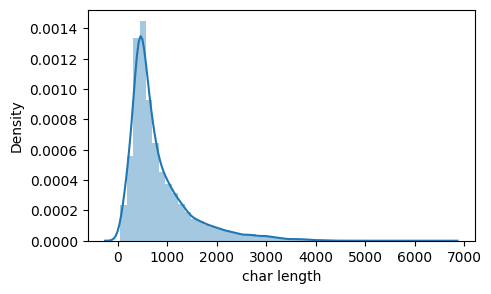

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,3))
sns.distplot(df['char length'])
plt.show()

In [ ]:
df['char length'].quantile(0.75)

1011.0

In [ ]:
df['char length'].describe()

,char length
count,10000.000000
mean,826.940300
std,638.370903
min,53.000000
25%,429.000000
50%,604.000000
75%,1011.000000
max,6559.000000


In [ ]:
df[df['sentiment']=='positive']

,review,sentiment,tokenized_review,char length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125
5,probably alltime favorite movie story selfless...,positive,"[probably, alltime, favorite, movie, story, se...",394,57
...,...,...,...,...,...
10009,former cambridge contemporary simon heffer tod...,positive,"[former, cambridge, contemporary, simon, heffe...",3709,481
10010,mans navy comments indicated rare wellfilmed l...,positive,"[mans, navy, comments, indicated, rare, wellfi...",709,108
10012,pleasantly surprised find lose friends alienat...,positive,"[pleasantly, surprised, find, lose, friends, a...",668,84
10013,moving film takes new twist somewhere relation...,positive,"[moving, film, takes, new, twist, somewhere, r...",413,59


In [ ]:
#distribution of char length for positive and negative

<ipython-input-66-034e290f8428>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']=='positive']['char length'])
<ipython-input-66-034e290f8428>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']=='negative']['char length'])


<Axes: xlabel='char length', ylabel='Density'>

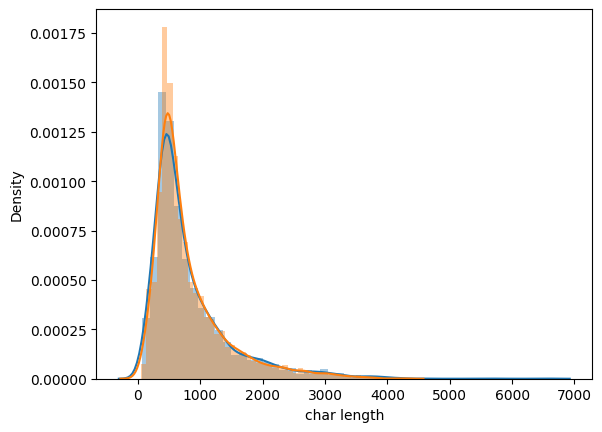

In [ ]:
sns.distplot(df[df['sentiment']=='positive']['char length'])
sns.distplot(df[df['sentiment']=='negative']['char length'])

In [ ]:
#FEATURE DOES NOT STRONGLY DISTINGUISH BETWEEN POSITIVE AND NEGATIVE POINT.

<ipython-input-68-8d2e7550cb80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']=='positive']['word_length'])
<ipython-input-68-8d2e7550cb80>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']=='negative']['word_length'])


<Axes: xlabel='word_length', ylabel='Density'>

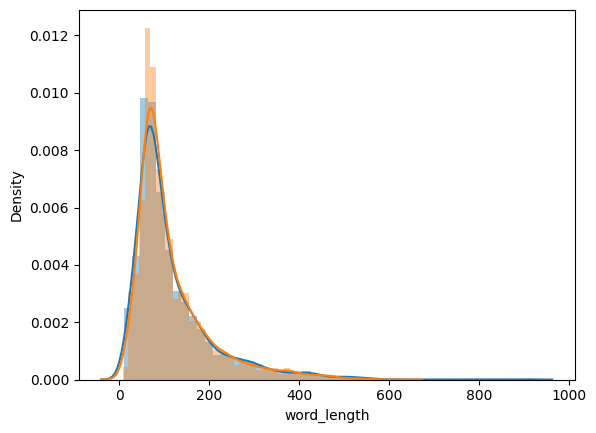

In [ ]:
sns.distplot(df[df['sentiment']=='positive']['word_length'])
sns.distplot(df[df['sentiment']=='negative']['word_length'])

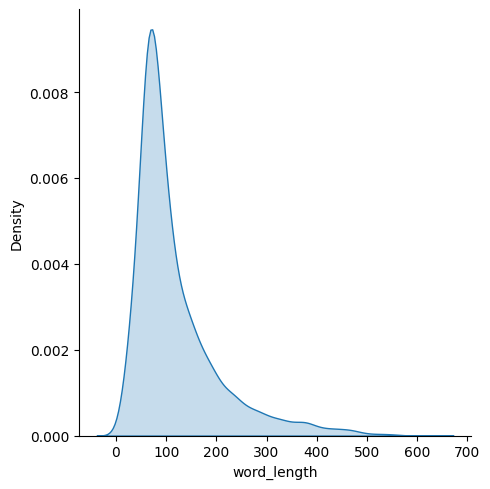

In [ ]:
sns.displot(df[df['sentiment']=='negative']['word_length'],kind='kde',fill=True)

In [ ]:
from nltk import ngrams

pd.Series(ngrams(df['tokenized_review'].sum(),2)).value_counts()

,count
"(I, would)",492
"(ever, seen)",459
"(special, effects)",438
"(I, seen)",429
"(even, though)",372
...,...
"(dead, make)",1
"(unexpected, appearance)",1
"(really, liven)",1
"(liven, party)",1


In [ ]:
pd.Series(ngrams(df['tokenized_review'].sum(),3)).value_counts()

,count
"(I, ever, seen)",169
"(worst, movie, ever)",69
"(I, would, like)",56
"(movie, ever, seen)",56
"(one, worst, movies)",55
...,...
"(would, grow, tedious)",1
"(grow, tedious, four)",1
"(tedious, four, hours)",1
"(four, hours, left)",1


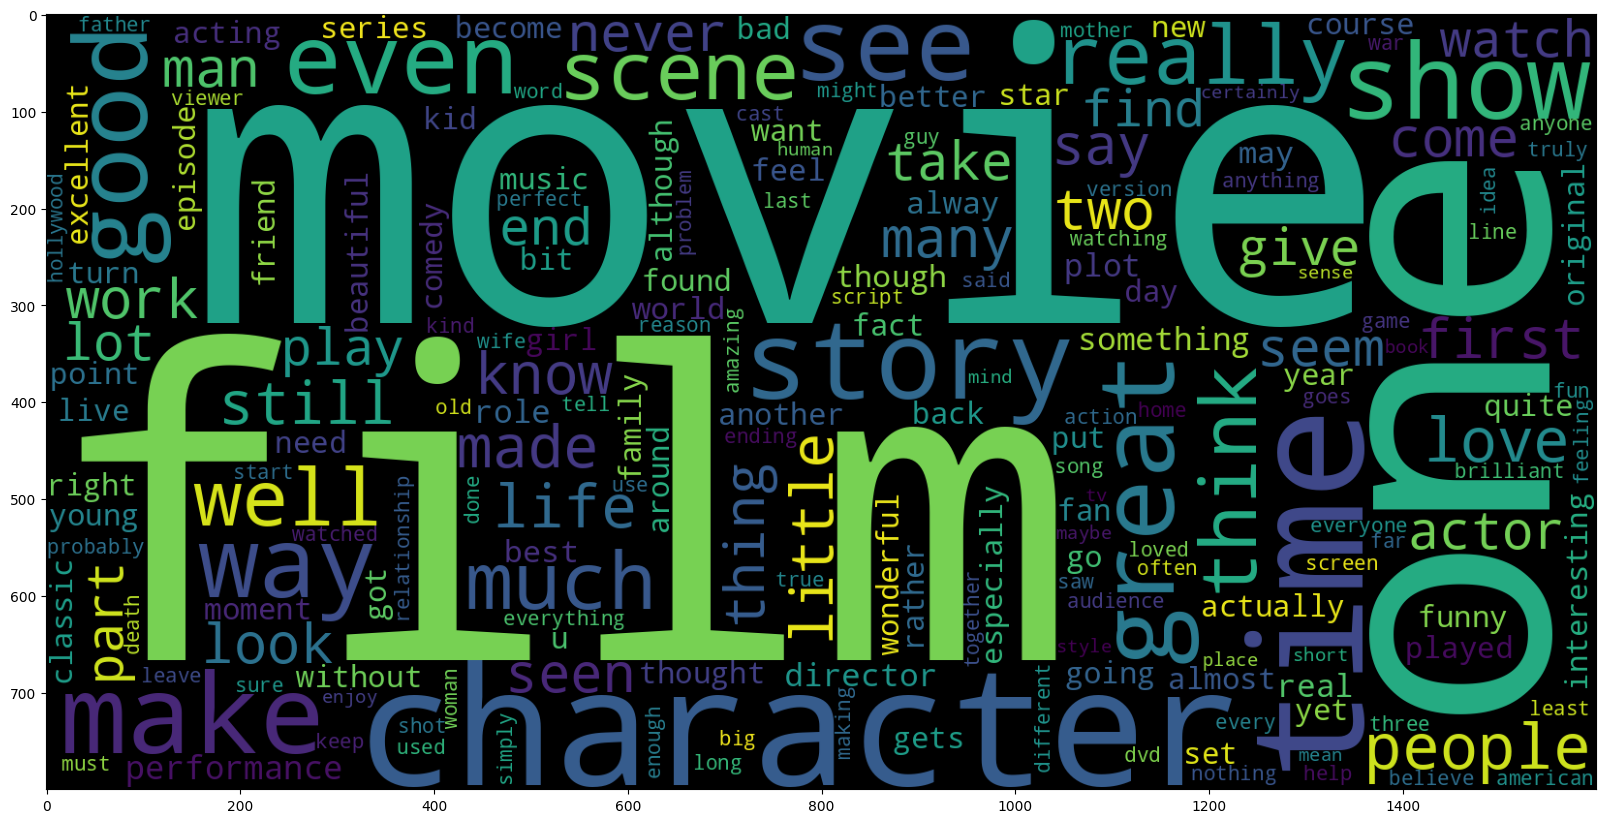

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
wc=WordCloud(width=1600 ,height = 800).generate(" ".join(df[df['sentiment']=='positive']['review']))
plt.imshow(wc)

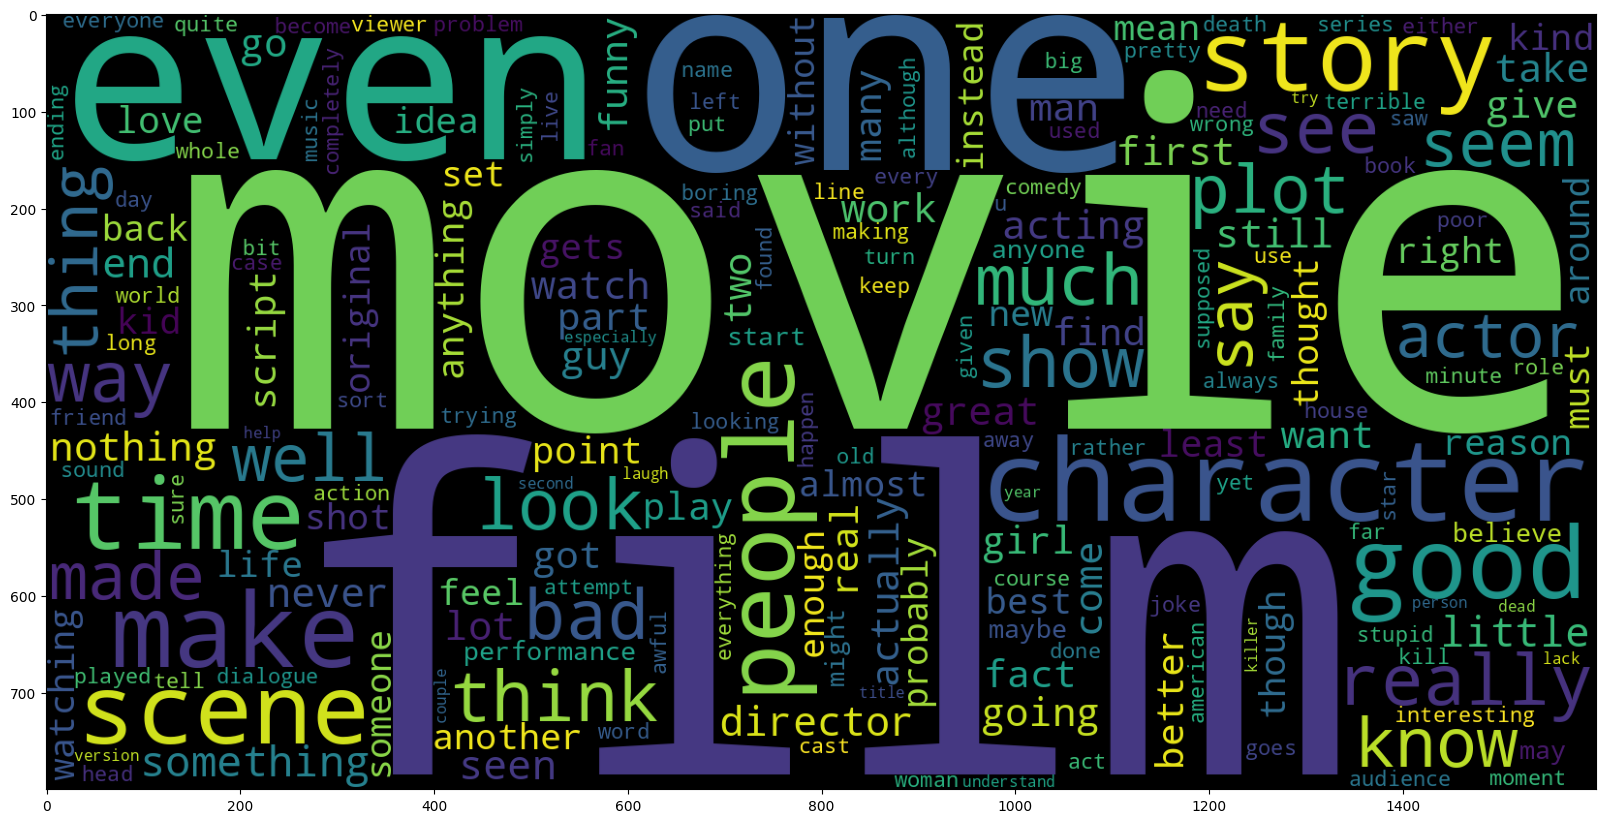

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
wc=WordCloud(width=1600 ,height = 800).generate(" ".join(df[df['sentiment']=='negative']['review']))
plt.imshow(wc)


In [ ]:
df.head()

,review,sentiment,tokenized_review,char length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125


In [ ]:
x=df.iloc[:,2:3].values

In [ ]:
x.shape

(10000, 1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500) # 2500 most important words

In [ ]:
x=cv.fit_transform(df['review']).toarray()

In [ ]:
x.shape

(10000, 2500)

In [ ]:
x[0].mean()

0.04

In [ ]:
y=df.iloc[:,1:2].values

In [ ]:
y.shape

(10000, 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(8000, 2500)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [ ]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [ ]:
y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)
y_pred3=clf3.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred2))
print("Bernoulli",accuracy_score(y_test,y_pred3))

Gaussian 0.8
Multinomial 0.8505
Bernoulli 0.848
